<a href="https://colab.research.google.com/github/yenlung/Python-Book/blob/master/%E5%86%92%E9%9A%AA_45_%E6%8B%BF%E7%9C%9F%E5%AF%A6%E4%B8%96%E7%95%8C%E7%9A%84%E8%B3%87%E6%96%99%E4%BE%86%E8%A9%A6%E8%A9%A6%E7%9C%8B%E2%80%94%E5%8A%A0%E5%B7%9E%E6%88%BF%E5%83%B9%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

照例先 `import` 我們標準套件。

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

接著引入我們線性迴歸的模型, 還有分割訓練/測試資料的函式。

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

接著是今天的主角, 我們要讀入加州房價資料集。

注: 之前我們都是用波士頓房價資料集, 但種種原因, 我們改用加州房價資料集。

In [3]:
from sklearn.datasets import fetch_california_housing
cal = fetch_california_housing()

看一下資料集的描述

In [4]:
print(cal.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

嗯，看起來有 8 個特徵跟 20,640 筆資料

把資料的名字跟 shape 印出來確認一下

In [5]:
print("feature names: cal.feature_names")
print("data shape: ", cal.data.shape)
print("target shape: ", cal.target.shape)

feature names: cal.feature_names
data shape:  (20640, 8)
target shape:  (20640,)


跟之前一樣，把「給模型當作參考的特徵」當成 X， 「要模型去學的答案」叫做 Y

In [6]:
X = cal.data
Y = cal.target

為了怕模型 overfit，我們需要把資料分成訓練資料跟測試資料

還要養成沒事查看 shape 以防手滑的好習慣

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("x_train:", x_train.shape, " x_test:", x_test.shape, " y_train:", y_train.shape, " y_test:", y_test.shape, )

x_train: (16512, 8)  x_test: (4128, 8)  y_train: (16512,)  y_test: (4128,)


因為已經很熟了，所以「叫出函數學習機」，「訓練函數學習機」，「把函數學習機拿來用」
可以一氣呵成！


In [8]:
regr = LinearRegression()
regr.fit(x_train, y_train)
y_predict = regr.predict(x_test)

為了看看模型是不是學的好棒棒，把「真實的結果」當作 x 座標，
「預測的結果」當作 y 座標描點在圖上

為了方便比較，再畫一條對角線當作比較基準！

(學得好的話，所有的點應該都會在對角線上，表示結果一樣)


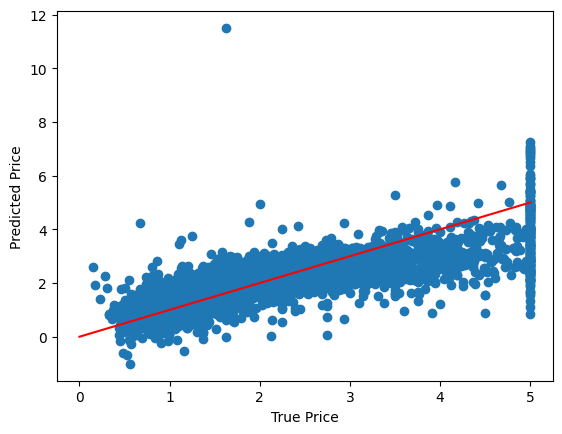

In [12]:
plt.scatter(y_test, y_predict)
plt.plot([0, 5], [0, 5], 'r')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

plt.show()